#Load data

In [92]:
import torch
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),  
])

# data_path = 'data/casia-webface'
# data_path = 'data/webface-10'
data_path = 'data/webface-small'

batch_size = 50

train_data = datasets.ImageFolder(data_path, transform=train_transform)

trainloader = torch.utils.data.DataLoader(
    train_data, shuffle=True, batch_size=batch_size)

Make sure dataset is loaded correctly

In [93]:
iterator = iter(trainloader)
image, label = next(iterator)

print("image", image[0])
print("label", label[0])
print("label", label[1])
print("label", label[2])
print("label", label[3])

image tensor([[[-0.5294, -0.5373, -0.5529,  ..., -0.8588, -0.8588, -0.8588],
         [-0.5216, -0.5373, -0.5529,  ..., -0.8588, -0.8588, -0.8588],
         [-0.5137, -0.5294, -0.5608,  ..., -0.8588, -0.8667, -0.8667],
         ...,
         [ 1.0000,  1.0000,  1.0000,  ..., -0.8510, -0.8588, -0.8588],
         [ 1.0000,  1.0000,  1.0000,  ..., -0.8510, -0.8588, -0.8667],
         [ 1.0000,  1.0000,  1.0000,  ..., -0.8510, -0.8588, -0.8667]],

        [[-0.5843, -0.5922, -0.6157,  ..., -0.8745, -0.8667, -0.8667],
         [-0.5765, -0.5922, -0.6157,  ..., -0.8745, -0.8667, -0.8667],
         [-0.5686, -0.5843, -0.6235,  ..., -0.8745, -0.8745, -0.8745],
         ...,
         [ 1.0000,  1.0000,  1.0000,  ..., -0.8510, -0.8588, -0.8588],
         [ 0.9922,  0.9922,  0.9922,  ..., -0.8510, -0.8588, -0.8667],
         [ 0.9922,  0.9922,  0.9922,  ..., -0.8510, -0.8588, -0.8667]],

        [[-0.7098, -0.7176, -0.7412,  ..., -0.8275, -0.8196, -0.8196],
         [-0.7020, -0.7176, -0.7412,  .

#Init the model

In [94]:
from torchvision.models import resnet18, ResNet18_Weights
from torch import nn, optim
import os
# model = resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
model = resnet18()
num_classes = len(os.listdir(data_path))
print(num_classes)

device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print(device)

model.fc = nn.Linear(512, num_classes)
model.to(device)


101
mps


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [95]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    # img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Test showing a picture and running model

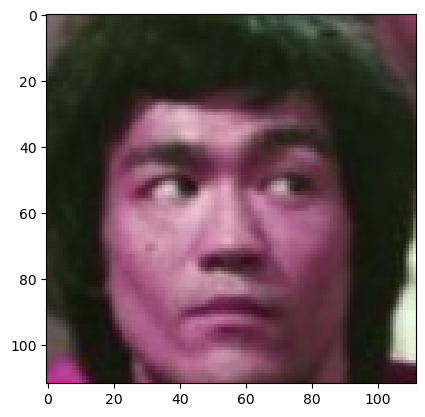

mps
tensor([[-0.3230,  0.0934, -0.3188,  0.8635, -0.3185, -0.4338,  0.7022, -0.3336,
         -0.3238,  0.0135,  0.5273,  0.3509, -0.3101, -0.3526, -0.3153, -0.6564,
          0.5099,  0.1873, -0.6630, -0.7695,  0.0292,  0.2452,  0.2106, -0.0080,
          0.2587,  0.1853,  0.9902,  0.1225, -0.0548, -0.0552, -0.3296,  0.8564,
          0.0130,  0.3669, -0.4119,  0.1820,  0.2840, -0.1376, -1.0965,  0.0049,
          0.4634, -0.1566, -0.3847,  0.5102, -0.4216, -0.1704,  0.1928, -0.4198,
         -0.0201, -0.4317,  0.1844,  0.2868, -0.1145,  0.7107,  0.0487,  0.1137,
          0.3238,  0.5879,  0.4366,  0.4854, -0.2787, -0.2087, -0.5572,  0.7031,
         -0.2070,  0.1642, -0.7344, -0.0265, -0.3718,  0.2164, -0.8585, -0.1881,
          0.8628,  0.0290, -0.6937,  0.8164,  0.3813,  0.1487,  0.6132,  0.0437,
          0.7387, -0.0521,  0.1114,  0.1776,  0.5467, -0.1711,  0.1472,  0.6868,
         -0.0657,  0.3381,  0.8762, -0.0462, -0.2450,  0.0612, -0.9305, -0.2768,
         -0.2277, -0.688

In [98]:
from PIL import Image

img = Image.open('./data/webface-10/000000/00000001.jpg')
timg = transforms.ToTensor()(img)
imshow(timg)
print(device)
timg = timg.unsqueeze(0).to(device)
# model.to(device)
print(model(timg))

#Load lfw dataset

In [150]:
batch_size_test = 50

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),  
])

lfw_test = datasets.LFWPairs(root='data', split='10fold', transform=test_transform, download=True)

test_loader = DataLoader(lfw_test, batch_size=batch_size_test, shuffle=True)

Files already downloaded and verified


In [118]:
print(len(lfw_test))
print(len(test_loader))

6000
6000


Feature extractor

In [101]:
import torch.nn.functional as F

def model_to_extractor(model):
    model.eval()
    feature_map = list(model.children())
    feature_map.pop()  # remove the final "class prediction" layer
    extractor = nn.Sequential(*feature_map) # create feature extractor
    # Inspect the structure - it is a nested list of various modules
    # print extractor[-1]       
    # print extractor[-2][-1]   
    return extractor

extractor = model_to_extractor(model)

def extract_features():
    labels_list = []
    extractor.to(device)
    extractor.eval()
    feat_pair1 = []
    feat_pair2 = []
    n = 0

    with torch.no_grad():
        for (imgs1, imgs2, labels) in iter(test_loader):
            imgs1, imgs2 = imgs1.to(device), imgs2.to(device)
            imgs1_out = extractor(imgs1)
            imgs2_out = extractor(imgs2)
            feat_pair1.append(imgs1_out.data)
            feat_pair2.append(imgs2_out.data)
            labels_list.append(labels.data)
            if (n == 10):
                print('done extracting for iteration', n)
        
    return feat_pair1, feat_pair2, labels_list


In [102]:
def tlist_to_squeezed(tensor_list):
    #Merge the array of tensors into one tensor
    merged_tensor = torch.cat(tensor_list, dim=0)
    return merged_tensor.squeeze() #Remove the extra dimension

def tlist_distance(tlist1, tlist2):
    tlist1 = tlist_to_squeezed(tlist1)
    tlist2 = tlist_to_squeezed(tlist2)
    return torch.norm(tlist1 - tlist2, dim=1)

Validate model function 1, plot curves

ROC-AUC: 0.6148


0.6148291666666668

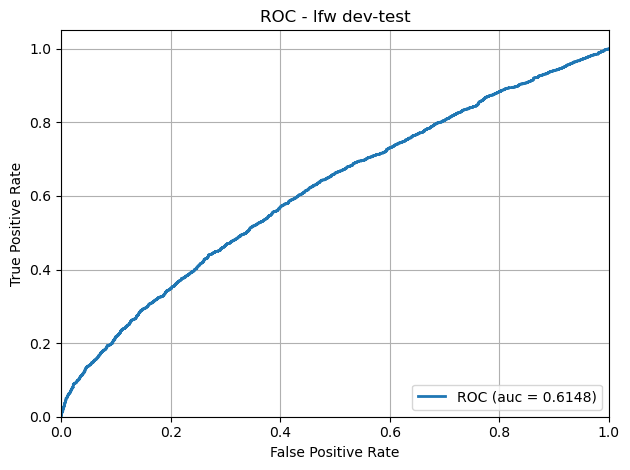

In [156]:
import matplotlib.pyplot as plt
import sklearn.metrics

def get_test_accuracy():
    feat_pair1, feat_pair2, labels = extract_features()
    feature_distance = tlist_distance(feat_pair1, feat_pair2)
    feat_dist = feature_distance.cpu().numpy()

    # Eval metrics
    scores = -feat_dist
    gt = torch.cat(labels).numpy()

    roc_auc = sklearn.metrics.roc_auc_score(gt, scores)
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(gt, scores)
    fig_path = "./figures/roc_auc.png"
    print ('ROC-AUC: %.04f' % roc_auc)
    # Plot and save ROC curve
    plot_roc(fpr, tpr, roc_auc, fig_path)
    return roc_auc

def plot_roc(fpr, tpr, roc_auc, fig_path, show=False):
    plt.title('ROC - lfw dev-test')
    plt.plot(fpr, tpr, lw=2, label='ROC (auc = %0.4f)' % roc_auc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.grid()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.savefig(fig_path, bbox_inches='tight')
    if show:
        plt.show()

get_test_accuracy()

epoch: 0, iter: 100, loss: 4.291996479034424, time: 0.24743154202587903
epoch: 0, iter: 200, loss: 4.152568340301514, time: 0.24821341701317579
0.1071888339318382
ROC-AUC: 0.5887
0.58872
epoch: 1, iter: 100, loss: 3.9668614864349365, time: 0.2467365000047721
epoch: 1, iter: 200, loss: 4.20861291885376, time: 0.24838170799193904
0.1492648553425029
ROC-AUC: 0.5979
0.59786
epoch: 2, iter: 100, loss: 3.8516650199890137, time: 0.24353804098791443
epoch: 2, iter: 200, loss: 3.803229331970215, time: 0.24321666700416245
0.18368453147232197
ROC-AUC: 0.5938
0.5938079999999999
epoch: 3, iter: 100, loss: 3.6648662090301514, time: 0.24860287498449907
epoch: 3, iter: 200, loss: 3.2967939376831055, time: 0.24666162498760968
0.2403279354969849
ROC-AUC: 0.6018
0.6018000000000001
epoch: 4, iter: 100, loss: 3.334606647491455, time: 0.2506184999947436
epoch: 4, iter: 200, loss: 3.4843363761901855, time: 0.24443087499821559
0.29514194728640153
ROC-AUC: 0.5979
0.597928
epoch: 5, iter: 100, loss: 2.705917835

/var/folders/45/kk87p73n0977ht5n3t0frz8c0000gn/T/ipykernel_45357/4025484907.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


epoch: 25, iter: 100, loss: 0.10817960649728775, time: 1.0332797089940868
epoch: 25, iter: 200, loss: 0.20406882464885712, time: 1.0283865419914946
0.9749983061183007
ROC-AUC: 0.6048
0.604788


/var/folders/45/kk87p73n0977ht5n3t0frz8c0000gn/T/ipykernel_45357/4025484907.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


epoch: 26, iter: 100, loss: 0.1492452621459961, time: 0.2487052499782294
epoch: 26, iter: 200, loss: 0.2417578399181366, time: 0.24980466699344106
0.9850938410461413
ROC-AUC: 0.6125
0.612464


/var/folders/45/kk87p73n0977ht5n3t0frz8c0000gn/T/ipykernel_45357/4025484907.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


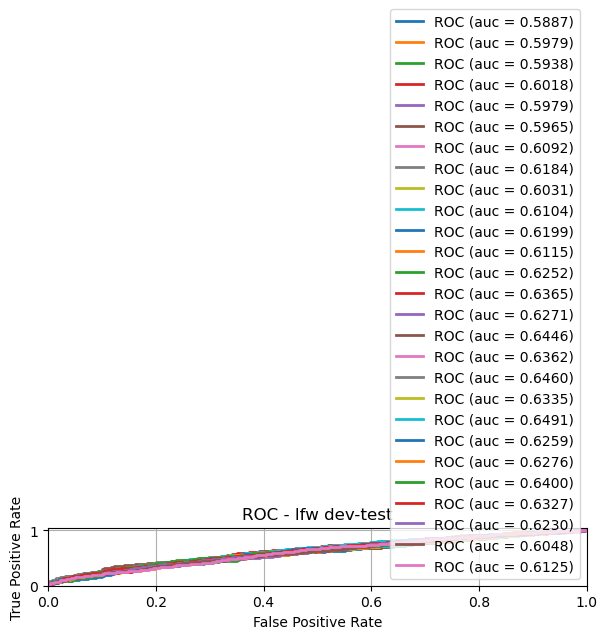

In [104]:
import time

learning_rate = 1e-3
num_epochs = 27
weight_decay = 0.0
momentum = 0.9

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),
                    lr=learning_rate,
                    momentum=momentum,
                    weight_decay=weight_decay)

def get_train_accuracy(model: nn.Module):
    correct = 0
    total = 0
    n = 0
    with torch.no_grad():
        for imgs, labels in iter(trainloader):
            imgs, labels = imgs.to(device), labels.to(device) # Move input data to the same device as the model
            model.eval()
            output = model(imgs) # We don't need to run torch.softmax
            pred = output.max(1)[1] # get the index of the max log-probability
            correct += pred.eq(labels).sum().item()
            total += imgs.shape[0]
            n += 1
    return correct / total 

for epoch in range(num_epochs):
    n = 0
    for imgs, labels in iter(trainloader):
        tic = time.perf_counter()
        # imshow(imgs[0])
        imgs = imgs.to(device)
        labels = labels.to(device)

        model.train() # annotate model for training

        out = model(imgs)
        loss = loss_fn(out, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        toc = time.perf_counter()
        n += 1
        if n % 100 == 0:
            print('epoch: {}, iter: {}, loss: {}, time: {}'.format(epoch, n, loss, toc - tic))
    print(get_train_accuracy(model))
    print(get_test_accuracy())

Validate model, function 2

In [153]:

def extractDeepFeature(img, model, device):
    # model.to(device)
    img = img.to(device)
    fc = model(img)
    fc = fc.to('cpu').squeeze()
    # fc = fc.to('cpu')
    
    return fc

def KFold(n=6000, n_folds=10):
    folds = []
    base = list(range(n))
    for i in range(n_folds):
        test = base[int(i * n / n_folds):int((i + 1) * n / n_folds)]
        train = list(set(base) - set(test))
        folds.append([train, test])
    return folds


def eval_acc(threshold, diff):
    y_true = []
    y_predict = []
    for d in diff:
        same = 1 if float(d[0]) > threshold else 0
        y_predict.append(same)
        y_true.append(int(d[1]))
    y_true = np.array(y_true)
    y_predict = np.array(y_predict)
    accuracy = 1.0 * np.count_nonzero(y_true == y_predict) / len(y_true)
    return accuracy


def find_best_threshold(thresholds, predicts):
    best_threshold = best_acc = 0
    for threshold in thresholds:
        accuracy = eval_acc(threshold, predicts)
        if accuracy >= best_acc:
            best_acc = accuracy
            best_threshold = threshold
    return best_threshold

def cosine_similarity(f1, f2):
    # compute cosine_similarity for 2-D array
    f1 = f1.numpy()
    f2 = f2.numpy()

    A = np.sum(f1*f2, axis=1)
    B = np.linalg.norm(f1, axis=1) * np.linalg.norm(f2, axis=1) + 1e-5

    return A / B

def compute_distance(img1, img2, model, flag, device):
        f1 = extractDeepFeature(img1, model, device)
        f2 = extractDeepFeature(img2, model, device)

        distance = cosine_similarity(f1, f2)

        flag = flag.squeeze().numpy()
        return np.stack((distance, flag), axis=1)

def obtain_acc(predicts, num_class, start):
    accuracy = []
    thd = []
    folds = KFold(n=num_class, n_folds=10)
    thresholds = np.arange(-1.0, 1.0, 0.005)
    
    for idx, (train, test) in enumerate(folds):
        best_thresh = find_best_threshold(thresholds, predicts[train])
        accuracy.append(eval_acc(best_thresh, predicts[test]))
        thd.append(best_thresh)
    end = time.time()
    time_used = (end - start) / 60.0
    # logger.info('LFW_ACC={:.4f} std={:.4f} thd={:.4f} time_used={:.4f} mins'.format(np.mean(accuracy), np.std(accuracy), np.mean(thd), time_used))
    print('LFW_ACC={:.4f} std={:.4f} thd={:.4f} time_used={:.4f} mins'.format(np.mean(accuracy), np.std(accuracy), np.mean(thd), time_used))
    return np.mean(accuracy)


def eval(model, num_classes, test_loader, device):
    predicts = np.zeros(shape=(len(test_loader.dataset), 2))

    model.eval()
    start = time.time()

    cur = 0
    with torch.no_grad():
        for (img1, img2, flag) in iter(test_loader):
            predicts[cur:cur+flag.shape[0]] = compute_distance(img1, img2, model, flag, device)
            cur += flag.shape[0]
    assert cur == predicts.shape[0]

    accuracy = obtain_acc(predicts, num_classes, start)

    # visualize the masks stats
    print('LFW_ACC', np.mean(accuracy))

    return np.mean(accuracy), predicts

In [157]:
# eval(model, len(lfw_test), test_loader, 10, device)

LFW_ACC=0.5605 std=0.0172 thd=0.6050 time_used=0.7511 mins
LFW_ACC 0.5605


(0.5605,
 array([[-0.05662413,  1.        ],
        [ 0.79474717,  1.        ],
        [ 0.37594408,  0.        ],
        ...,
        [ 0.29355612,  0.        ],
        [ 0.59890682,  1.        ],
        [ 0.46233547,  0.        ]]))

In [ ]:
import time

learning_rate = 1e-3
num_epochs = 27
weight_decay = 0.0
momentum = 0.9

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),
                    lr=learning_rate,
                    momentum=momentum,
                    weight_decay=weight_decay)

def get_train_accuracy(model: nn.Module):
    correct = 0
    total = 0
    n = 0
    with torch.no_grad():
        for imgs, labels in iter(trainloader):
            imgs, labels = imgs.to(device), labels.to(device) # Move input data to the same device as the model
            model.eval()
            output = model(imgs) # We don't need to run torch.softmax
            pred = output.max(1)[1] # get the index of the max log-probability
            correct += pred.eq(labels).sum().item()
            total += imgs.shape[0]
            n += 1
    return correct / total 

for epoch in range(num_epochs):
    n = 0
    for imgs, labels in iter(trainloader):
        tic = time.perf_counter()
        # imshow(imgs[0])
        imgs = imgs.to(device)
        labels = labels.to(device)

        model.train() # annotate model for training

        out = model(imgs)
        loss = loss_fn(out, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        toc = time.perf_counter()
        n += 1
        if n % 100 == 0:
            print('epoch: {}, iter: {}, loss: {}, time: {}'.format(epoch, n, loss, toc - tic))
    if epoch % 5 == 0:
        print('train acc:', get_train_accuracy(model))
        print('val acc 1:', get_test_accuracy())
        print('val acc 2: ', eval(model, len(lfw_test), test_loader, 10, device)[0])